# Understanding Linear Regression

Welcome! In this notebook, we'll explore linear regression both from scratch and using scikit-learn.
We'll start with the raw algorithm to understand the math and mechanics, then use scikit-learn for simplicity and efficiency.

### 🔍 Peek Under the Hood: The Magic Behind Linear Regression ✨

Alright team, now that you’re buzzing about regression, let’s peek under the hood — the raw algorithm that powers this magic. 🧙‍♂️✨

Imagine you have a scatter plot — points scattered all over the place. Your job? Draw the best straight line through those points that captures the general trend. That’s what **linear regression** is all about — finding a line that best fits the data. 📈

Mathematically, this line looks like:

$$
y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

Here:

- \(x_1, x_2, \dots, x_n\) are your features — like house size, number of bedrooms... 🏠🛏️  
- \(w_1, w_2, \dots, w_n\) are the weights (coefficients) — telling you how much each feature matters. ⚖️  
- \(b\) is the bias (intercept) — the point where the line crosses the y-axis. 🎯

But how do we find the best weights and bias? We want the line that makes our predictions as close as possible to the true values. 🎯

We measure this closeness with a loss function — often the **Mean Squared Error (MSE)**, which averages the squares of the differences between predicted and actual values. 📉

Our goal: **Minimize the MSE.** 🎯✅

To do this, we use a method called **Gradient Descent** — an algorithm that tweaks \(w\) and \(b\) little by little, walking downhill on the error surface until it reaches the lowest point. 🏞️⛰️

It’s like hiking down a mountain in the fog, always stepping in the direction that lowers your elevation the most. 🥾🌫️

- We calculate the gradient (slope) of the loss with respect to each weight and bias. 📐  
- Then, we update each parameter by moving a small step in the opposite direction of the gradient. 🔄  
- Repeat, repeat, repeat — until we can’t go any lower! 🔁

Sounds like a lot, right? But don’t worry — computers handle the heavy lifting. 🤖💪

---

Now, this raw approach is great for understanding the nuts and bolts, but in practice, we have tools that make this **super** easy! 🚀✨



Ready to dig into the math and code? Let’s go! 🚀🔥


## Linear Regression from Scratch


#### Linear Regression from Scratch: Understanding the Algorithm and Math

Let's implement linear regression manually using gradient descent to find the best-fit line for a small dataset.

Welcome to the heart of machine learning — the raw mechanics behind **linear regression**! Before we dive into libraries and shortcuts, let's roll up our sleeves and understand what happens under the hood.



### What are we trying to do?

Imagine you have some data points — pairs of inputs and outputs — scattered on a graph. Our goal is to find a **line** that best fits these points, so we can **predict** new outputs for any input. This line is described by a simple equation:

$$
y = w \times x + b
$$

- **\(x\)** is our input feature.  
- **\(y\)** is the output we want to predict.  
- **\(w\)** (weight) is the slope of the line — it tells us how much \(y\) changes when \(x\) changes.  
- **\(b\)** (bias) is the intercept — where the line crosses the \(y\)-axis.

### How do we find the best \(w\) and \(b\)?

We want our line to be as close as possible to all the data points. To measure closeness, we use the **Mean Squared Error (MSE)**:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

- \(n\) is the number of data points.  
- \(y_i\) is the actual output.  
- \(\hat{y}_i\) is the predicted output from our line.

Minimizing this error means finding the \(w\) and \(b\) that make our predictions \(\hat{y}\) as close as possible to the true \(y\).

### How do we minimize the error?

We use **Gradient Descent** — a smart way for our algorithm to learn by trial and error:

1. **Start with random values** for \(w\) and \(b\) (we start at zero here).  
2. **Calculate the error** (MSE) based on current \(w\) and \(b\).  
3. **Compute gradients** — the direction and steepness to change \(w\) and \(b\) to reduce error. Mathematically:

$$
\frac{\partial MSE}{\partial w} = -\frac{2}{n} \sum_{i=1}^n x_i (y_i - \hat{y}_i)
$$

$$
\frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i)
$$

4. **Update \(w\) and \(b\)** by moving a small step opposite the gradient (downhill):

$$
w = w - \alpha \times \frac{\partial MSE}{\partial w}
$$

$$
b = b - \alpha \times \frac{\partial MSE}{\partial b}
$$

Where \(\alpha\) is the learning rate — a small number controlling the step size.

5. **Repeat** this process over many iterations (epochs) until the error stops improving.

### Why is this cool?

Because instead of guessing the perfect line manually, we let the data and math teach the model gradually — step by step — until it finds the best fit.

This iterative process is the foundation for many machine learning algorithms, making it a vital concept to understand deeply.

---

Ready to see this in action? Let’s implement gradient descent and watch our model learn the best line from scratch!


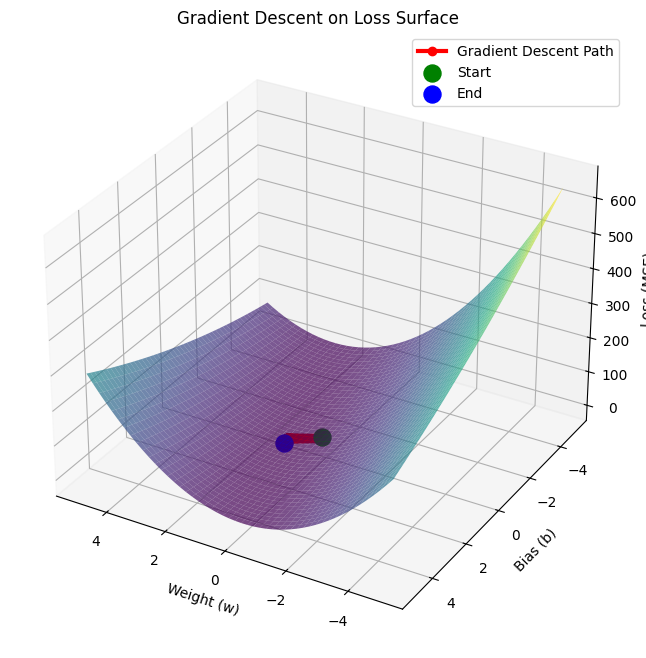

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 2, 5, 6])
n = len(X)

# Loss function (MSE)
def mse_loss(w, b):
    y_pred = w * X + b
    return np.mean((y - y_pred)**2)

# Grid for w and b
w_range = np.linspace(-5, 5, 50)
b_range = np.linspace(-5, 5, 50)
W, B = np.meshgrid(w_range, b_range)

# Compute loss surface
Z = np.array([[mse_loss(w, b) for w, b in zip(w_row, b_row)] for w_row, b_row in zip(W, B)])

# Gradient descent
w, b = 0, 0
learning_rate = 0.005  # smaller learning rate for smoother descent
epochs = 150            # more epochs for longer path
path = []

for _ in range(epochs):
    y_pred = w * X + b
    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w -= learning_rate * dw
    b -= learning_rate * db
    loss = mse_loss(w, b)
    path.append((w, b, loss))

path = np.array(path)
w_path, b_path, loss_path = path[:,0], path[:,1], path[:,2]

# Plotting
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Plot gradient descent path with bigger markers and thick line
ax.plot(w_path, b_path, loss_path, color='red', marker='o', markersize=6, linewidth=3, label='Gradient Descent Path')

# Highlight start and end points
ax.scatter(w_path[0], b_path[0], loss_path[0], color='green', s=150, label='Start')
ax.scatter(w_path[-1], b_path[-1], loss_path[-1], color='blue', s=150, label='End')

# Labels and title
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Gradient Descent on Loss Surface')
ax.legend()

# Adjust view angle
ax.view_init(elev=30, azim=120)

plt.show()


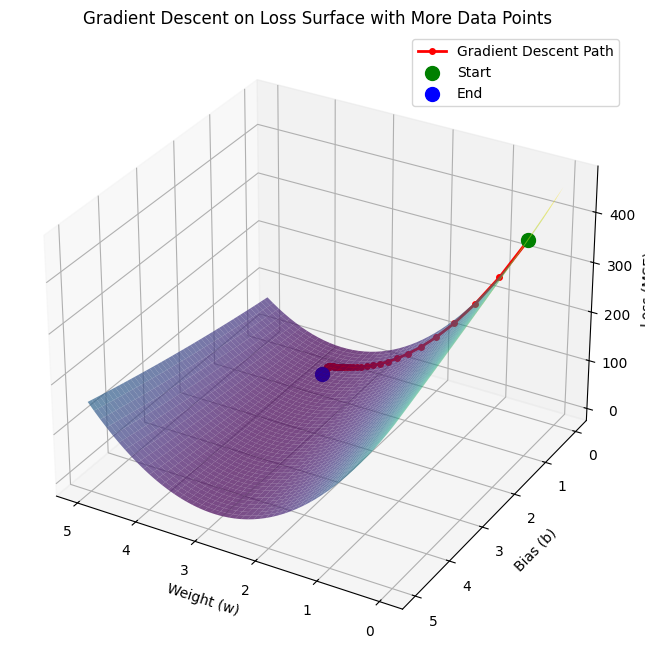

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# More data points with noise
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 3.5 * X + 2 + np.random.normal(0, 3, size=X.shape)
n = len(X)

def mse_loss(w, b):
    y_pred = w * X + b
    return np.mean((y - y_pred)**2)

# Grid for w and b
w_range = np.linspace(0, 5, 50)
b_range = np.linspace(0, 5, 50)
W, B = np.meshgrid(w_range, b_range)

# Calculate loss surface
Z = np.array([[mse_loss(w, b) for w, b in zip(w_row, b_row)] for w_row, b_row in zip(W, B)])

# Gradient descent
w, b = 0, 0
learning_rate = 0.002
epochs = 200
path = []

for _ in range(epochs):
    y_pred = w * X + b
    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w -= learning_rate * dw
    b -= learning_rate * db
    loss = mse_loss(w, b)
    path.append((w, b, loss))

path = np.array(path)
w_path, b_path, loss_path = path[:,0], path[:,1], path[:,2]

# Plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.7, edgecolor='none')
ax.plot(w_path, b_path, loss_path, color='red', marker='o', markersize=4, linewidth=2, label='Gradient Descent Path')
ax.scatter(w_path[0], b_path[0], loss_path[0], color='green', s=100, label='Start')
ax.scatter(w_path[-1], b_path[-1], loss_path[-1], color='blue', s=100, label='End')

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Gradient Descent on Loss Surface with More Data Points')
ax.legend()
ax.view_init(elev=30, azim=120)
plt.show()


# 🤔 What’s Up with These Funky Shapes?

Have you ever stared at a **loss function** and wondered: *"What even is this weird shape? Why does it look like a hill, a valley, or sometimes just a flat pancake?"*

Well, get ready for an **Aha! moment** — because functions are not just boring formulas on paper. They can be **beautiful, colorful shapes** that tell stories about how things change and interact. 🎨✨

From simple straight lines to elegant curves, and from wavy oscillations to the complex landscapes of loss functions, every function has its own unique "personality."

This, my friend, **is the beauty of math and machine learning!**

Let’s visualize some of these functions step-by-step and discover the magic hiding inside those equations! 🚀

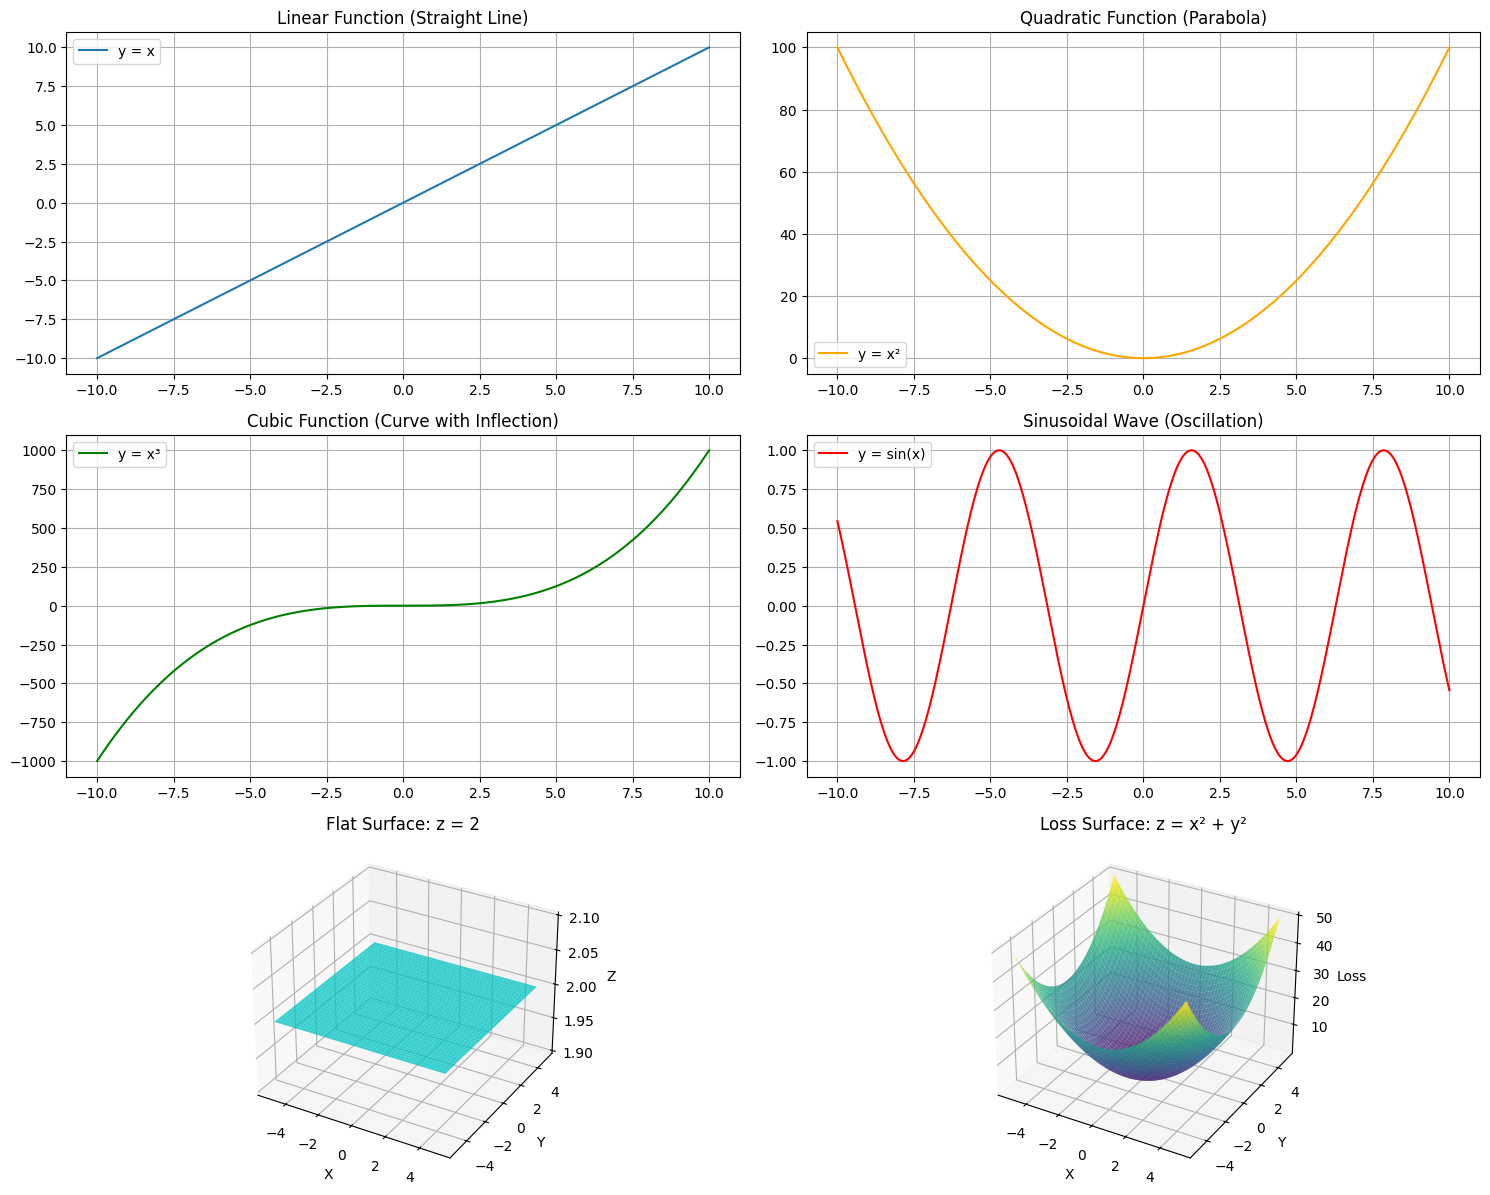

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1D Domain for simple plots
x = np.linspace(-10, 10, 400)

plt.figure(figsize=(15, 12))

# 1. Linear Function: y = x
plt.subplot(3, 2, 1)
y_linear = x
plt.plot(x, y_linear, label='y = x')
plt.title('Linear Function (Straight Line)')
plt.grid(True)
plt.legend()

# 2. Quadratic Function: y = x^2
plt.subplot(3, 2, 2)
y_quad = x**2
plt.plot(x, y_quad, label='y = x²', color='orange')
plt.title('Quadratic Function (Parabola)')
plt.grid(True)
plt.legend()

# 3. Cubic Function: y = x^3
plt.subplot(3, 2, 3)
y_cubic = x**3
plt.plot(x, y_cubic, label='y = x³', color='green')
plt.title('Cubic Function (Curve with Inflection)')
plt.grid(True)
plt.legend()

# 4. Oscillating Function: y = sin(x)
plt.subplot(3, 2, 4)
y_sin = np.sin(x)
plt.plot(x, y_sin, label='y = sin(x)', color='red')
plt.title('Sinusoidal Wave (Oscillation)')
plt.grid(True)
plt.legend()

# 5. Flat Surface: z = constant (3D plot)
ax5 = plt.subplot(3, 2, 5, projection='3d')
X5 = np.linspace(-5, 5, 50)
Y5 = np.linspace(-5, 5, 50)
X5, Y5 = np.meshgrid(X5, Y5)
Z5 = np.ones_like(X5) * 2
ax5.plot_surface(X5, Y5, Z5, color='cyan', alpha=0.8)
ax5.set_title('Flat Surface: z = 2')
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('Z')

# 6. Complex Loss Surface: z = (x^2 + y^2)
ax6 = plt.subplot(3, 2, 6, projection='3d')
X6 = np.linspace(-5, 5, 50)
Y6 = np.linspace(-5, 5, 50)
X6, Y6 = np.meshgrid(X6, Y6)
Z6 = X6**2 + Y6**2
ax6.plot_surface(X6, Y6, Z6, cmap='viridis', alpha=0.8)
ax6.set_title('Loss Surface: z = x² + y²')
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.set_zlabel('Loss')

plt.tight_layout()
plt.show()


Epoch 0, Loss: 18.0000, w: 0.2680, b: 0.0800
Epoch 100, Loss: 1.2521, w: 1.0117, b: 0.7745
Epoch 200, Loss: 1.1379, w: 0.9222, b: 1.0978
Epoch 300, Loss: 1.0799, w: 0.8584, b: 1.3283
Epoch 400, Loss: 1.0504, w: 0.8129, b: 1.4925
Epoch 500, Loss: 1.0355, w: 0.7804, b: 1.6096
Epoch 600, Loss: 1.0279, w: 0.7573, b: 1.6930
Epoch 700, Loss: 1.0240, w: 0.7409, b: 1.7525
Epoch 800, Loss: 1.0220, w: 0.7291, b: 1.7949
Epoch 900, Loss: 1.0210, w: 0.7208, b: 1.8251


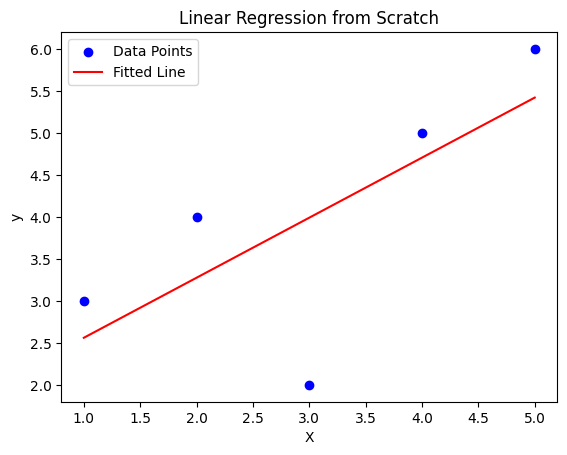

In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Create a small dataset
X = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y = np.array([3, 4, 2, 5, 6], dtype=np.float32)

# Initialize parameters
w = 0.0  # weight (slope)
b = 0.0  # bias (intercept)
learning_rate = 0.01
epochs = 1000
n = len(X)

# Gradient Descent
for epoch in range(epochs):
    # Predictions
    y_pred = w * X + b
    
    # Compute gradients
    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        loss = np.mean((y - y_pred) ** 2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, w: {w:.4f}, b: {b:.4f}")

# Plot results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, w*X + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression from Scratch')
plt.show()

## Linear Regression Using scikit-learn

---

### Enter **scikit-learn** 🛠️

With just a few lines of code, scikit-learn’s `LinearRegression` class will fit the best line for you using highly optimized algorithms behind the scenes. 🎉💻

No need to write gradient descent yourself unless you want to dive deeper! 🤓📚

---

Now, let's use scikit-learn to do the same with much less code.

Coefficient (w): 0.7000
Intercept (b): 1.9000


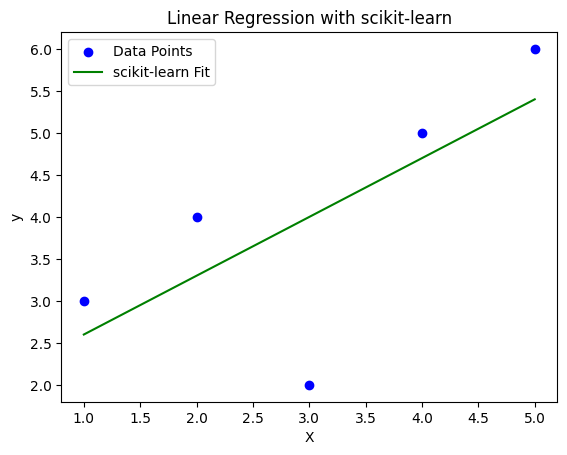

In [9]:
# Import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Data (reshape for sklearn)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([3, 4, 2, 5, 6])

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

print(f"Coefficient (w): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.4f}")

# Plot
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='green', label='scikit-learn Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with scikit-learn')
plt.show()